# Data Madness Notebook - "Go where you are treated best !" 

**The following notebook presents the work done by Group 2 for the Data Madness project which is part of the examination for the third year course KEN 3450 Data Analysis.** 

Eve is an aspiring young data scientist and soon-to-be DSAI bachelor graduate. As many young professionals, such as also ourselves, Tim, Alain and Hendrik (the authors of this notebook), she is asking herself how much she can earn once she completed her data science degree. Eve is flexible when it comes to where she lives as she was a student until now and if the conditions are right, she would happily move to a given country. 

<img src="EveDataScientist.png" width="400" height="300" align="left"/><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Eve - the aspiring young data scientist and protagonist of our Notebook (source: iStock)

#### (1) Data professional salary and living expenditures
Eve is especially interested in how the salary for data scientists differs from country to country and how much of that money she can actually keep.

As there are also other expenditures that Eve would have to pay for she also asks herself how the picture changes once some of these costs are taken into account.

#### (2) The influence of gender on salary in data science and related fields
[A lot of talk](https://www.theguardian.com/money/2021/mar/08/young-women-must-work-40-years-longer-than-men-to-plug-100k-pension-gap) these days is about [equal pay for equal work](https://en.wikipedia.org/wiki/Gender_pay_gap) independent of personal attributes such as gender, sexual orientation and ethnicity and we write the year [2021](https://medium.com/ill-meet-you-at-the-crossroads/chinese-new-year-2021-year-of-the-metal-ox-1a97b7552176) afterall, so surely [the problem](https://towardsdatascience.com/please-mind-the-gender-pay-gap-9162f13b4202) has been remedied yet? 
Eve is open-minded and well-educated, also in other areas apart from informatics. She wants to know whether her gender has any effect on the expected salary in the country that she wants to move to. Can she see differences in a country comparison regarding the impact of gender on pay in her industry?
 
#### (3) Should I do a Masters?
Finally, Eve asks herself a pressing question that is probably on most of our minds these days (at least if you are an aspiring data science bachelor graduate): "Should I continue to do a Masters? 
Putting the joy and other advantages from diving deep(er) and doing research in the context/environment of a higher education organisation aside for a moment, is it worth it from a monetary perspective to pursue a Masters degree in an informatics field (e.g. Data Science, Operations Research)?

## EDA
### Import the data from our two main sources for salary and personal data:
+ [2017](https://www.kaggle.com/kaggle/kaggle-survey-2017), [2018](https://www.kaggle.com/kaggle/kaggle-survey-2018) and [2019](https://www.kaggle.com/c/kaggle-survey-2019/data) Kaggle Machine Learning & Data Science Survey **(1)**
+ 2017, 2018 and 2019 [Data Professional Salary Survey Results](https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/). The survey is conducted by Brent Ozar, a private database consultant. **(2)**

In order to get as large of a dataset containg salary data and other personal data of data/informatics professionals as possible, as well as to account for biases in the selection of the sample population, we aggregate data from multiple different sources and years (2017-2019). While this approach has advantages (more and more reliable data from a broad population), it is also more complicated as we have to deal with some incompatibility issues.<br>

*Whats meant with biases in the selection of the sample population?* - For example, the Brend Ozar survey is mainly answered by professionals in the Database domain as this is his expertise. The people who visit his website and fill out the survey are more likely to be DB professionals (or stemming from a closely related field) than say Machine Learning researchers. We are however aiming at investigating the salary data of a broader population with all kinds of data professionals.

__IMPORTANT:__ In case you want to access the Numbeo API from this notebook, in order to allow ipynb to use large data streams, type the below instruction into your terminal. This does not work in case you are running jupyter from conda.

`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`

In [218]:
# IMPORTS GALORE
import pandas as pd
import numpy as np
import scipy as sp


# from numpy import sqrt, abs, round
# from scipy.stats import norm


import statsmodels.formula.api as sm
import statsmodels.stats.weightstats as ws
from statistics import stdev
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')   #seaborn-poster
plt.rcParams['figure.figsize'] = (11, 8)


#activate if need arises:
import warnings
warnings.filterwarnings('ignore')

### 1.1.1 Import the ML and Data Science Survey Data

In [219]:
#local filepath, do not re-run cell or specify given file path on local machine 
file = '2017multipleChoiceResponses.csv'
# file = '/Users/HendrikS/Documents/GitHub/Data-Madness/2017multipleChoiceResponses.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

+ The data is in ascii encoding, thus the encoding that we use with the pandas `pandas.read_csv` function should be [ISO-8859-1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1):

In [220]:
df_KGLresponse17 = pd.read_csv('2017multipleChoiceResponses.csv',encoding = "ISO-8859-1", engine ='python')
df_KGLresponse18 = pd.read_csv('2018multipleChoiceResponses.csv',encoding = "ISO-8859-1", engine ='python')
df_KGLresponse19 = pd.read_csv('2019multipleChoiceResponses.csv',encoding = "ISO-8859-1", engine ='python')

+ For the exploration and in order to spot similar variables between the different data frames, we want to see all variable Names:

In [221]:
pd.set_option('display.max_columns', None)

**Get an idea of the data of 2017:**

In [222]:
df_KGLresponse17.head(5)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

In [223]:
df_KGLresponse17.shape

(16716, 228)

+ Adding a `SurveyYear` column as the first column to all KGL dataframes:

In [224]:
# run this only once!
#2017
df_KGLresponse17['Survey Year'] = 2017
cols = df_KGLresponse17.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_KGLresponse17 = df_KGLresponse17[cols]
#2018
df_KGLresponse18['Survey Year'] = 2018
cols = df_KGLresponse18.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_KGLresponse18 = df_KGLresponse18[cols]
#2019
df_KGLresponse19['Survey Year'] = 2019
cols = df_KGLresponse19.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_KGLresponse19 = df_KGLresponse19[cols]


**Columns from KGL17 which are interesting for this analysis:**<br>

Columns that are interesting, but are difficult to work with  especially when considering the other data source (because e.g. the question goes into depth about ML) are noted in brackets. We have to keep in mind that the survey by Brent Ozar is answered by mainly database professionals which do not use, for instance, ML techniques often.

+ Column names are mostly self-explanatory. In case they are not, a description is added

+ `Survey Year`
+ `GenderSelect`
+ `Country` - The country you currently live in. (Note: As opposed to working in.)
+ `Age`  (not asked in other data source)
+ `EmploymentStatus`
+ `CurrentJobTitleSelect` (For job title there is also a FreeForm, i.e. the user can specify an own JobTitle which is not considered for this analysis). BUT: Free form responses are randomized within a column, so that reading across a single row does not give a single user's answers. Therefore, we disregard Free Form responses in this analysis.
+ `FormalEducation`
+ `MajorSelect` - Which best describes your undergraduate major? 
+ `Tenure` - How long have you been writing code to analyze data?
+ `EmployerSize` - How many employees work at your current or most recent company?
+ `CompensationAmount` - What is your current total yearly compensation (salary + bonus)? - Total Amount (e.g. 75,000)
+ `CompensationCurrency` - What is your current total yearly compensation (salary + bonus)? - Choose your currency
+ `JobSatisfaction` - On a scale from 0 (Highly Dissatisfied) - 10 (Highly Satisfied), how satisfied are you with your current job?


Possible additional variables:
+ (`MLSikllsSelect`) - In which areas of machine learning do you consider yourself competent?
+ (`MLTechniquesSelect`) - In which machine learning techniques do you consider yourself competent?
+ `ParentsEducation` - What's the highest level of education completed by either of your parents?
+ `EmployerIndustry` (no comparable variable in other data source, only `EmploymentSector`-public or private)

+ `JobFactorSalary` - How are you assessing potential job opportunities? - The compensation and benefits offered   (only asked to Learners)
+ `JobFactor_X_` - JobFactor questions only asked to respondents of type 'Learners'



**Get an idea of the data of 2018:**

In [225]:
df_KGLresponse18.head()  #header should be =1

,Survey Year,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_

In [226]:
df_KGLresponse18.shape

(23860, 396)

+ For the 2018 and 2019 survey the `CompensationAmount` is asked for as follows: What is your current yearly compensation (approximate $USD)? So we do not have an additional currency column.

+ From 2017 to 2018 we are loosing following variables: `EmploymentStatus`,`EmployerSize`,`JobSatisfaction`

+ Renaming the relevant columns in the 2018 data:

In [227]:
df_KGLresponse18 = df_KGLresponse18.rename(columns={'Q1': 'GenderSelect', 'Q2': 'Age', 'Q3': 'Country', 'Q4': 'FormalEducation', 'Q6': 'CurrentJobTitleSelect', 'Q7' : 'EmployerIndustry', 'Q8' : 'Tenure', 'Q9' : 'SalaryUSD'})                              


**Get an idea of the data of 2019:**

In [228]:
df_KGLresponse19.head(2)  #header should be =1

,Survey Year,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,2019,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media 

In [229]:
df_KGLresponse19.shape

(19718, 247)

+ `EmployerSize` is again a variable in the 2019 data, instead `EmployerIndustry` is missing.

Renaming the relevant columns in the 2019 data:

In [230]:
df_KGLresponse19 = df_KGLresponse19.rename(columns={'Q1': 'Age', 'Q2': 'GenderSelect', 'Q3': 'Country', 'Q4': 'FormalEducation', 'Q5': 'CurrentJobTitleSelect', 'Q6' : 'EmployerSize', 'Q10' : 'SalaryUSD', 'Q15' : 'Tenure'}) 


For 2018 and 2019 the order of questions has changed quite a bit. Even from 2018 to 2019 there are quite some changes. in Section 1.1.3 we extract the relevant columns from all three data frames.

### 1.1.2 Import the Professional Salary Survey Data

In [231]:
df_OZRresponse = pd.read_excel('Data_Professional_Salary_Survey_Responses.xlsx', header = 3)

In [232]:
df_OZRresponse.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,DatabaseServers,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),NaN,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,No,2,Not Asked,None,Not Asked,500,Associates (2 years),No,"No, I never have",40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,None,Not Asked,30,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


Observation: Some questions are only asked up from more recent years. Most importantly, Gender was only asked up from 2018. 

**Columns which interesting for this analysis:**
+ `Survey Year`
+ `SalaryUSD`
+ `Country`  (We assume here (and it also follows from the [website](https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/) of the survey "[...] of you in 63 countries answered"), that this is the country of residence of the respondent.  Since this is the case for both data sources, we assume from now on that the country variable encodes the country of residence and that it is the same as the country where one is employed/works (which might not be true in all cases).
+ `EmploymentStatus`
+ `JobTitle`
+ `YearsWithThisTypeOfJob`
+ `CompanyEmployeesOverall` (was only asked up from 2019)
+ `Education`
+ `HoursWorkedPerWeek` (not a variable in other data source)
+ `PopulationOfLargestCityWithin20Miles` (was only asked up from 2019 and no comparable variable in other data source)
+ `LookingForAnotherJob` (somewhat comparable with `JobSatisfaction` from KGLE data)
+ `Gender` (was only asked up from 2018)



### 1.1.3 Extracting the relevant data

Let's extract the variables that are relevant for the data analysis from the first source, the Kaggle ML and Data Science Surveys from the years 2017, 2018 and 2019 first.The questions/variables have changed in content as well as location from year to year. We thus have to manually gather the variables from each dataframe that we are interested in.

In [233]:
# conflicts: age not in OZR Data, still need to deal with different currencies, deal with EmployerIndustry

relevantVars17 = ['Survey Year',
                  'CompensationAmount',
                  'CompensationCurrency',
                  'Country',
                  'EmploymentStatus',
                  'CurrentJobTitleSelect',
                  'Tenure',
                  'EmployerSize',
                  'FormalEducation',
                  'JobSatisfaction',
                  'EmployerIndustry',
                  'GenderSelect',
                  'Age']    #leave MajorSelect out for now (conflict with other dataset)

df_KGL17_da = df_KGLresponse17[relevantVars17]
df_KGL17_da.shape

(16716, 13)

In [234]:
relevantVars18 = ['Survey Year',
                  'SalaryUSD',
                  'Country',
                  'CurrentJobTitleSelect',
                  'Tenure',
                  'FormalEducation',
                  'EmployerIndustry',
                  'GenderSelect',
                  'Age'] 

df_KGL18_da = df_KGLresponse18[relevantVars18]
df_KGL18_da.shape

(23860, 9)

In [235]:
df_KGLresponse19 = df_KGLresponse19.rename(columns={'Q1': 'Age', 'Q2': 'GenderSelect', 'Q3': 'Country', 'Q4': 'FormalEducation', 'Q5': 'CurrentJobTitleSelect', 'Q6' : 'EmployerSize', 'Q10' : 'SalaryUSD', 'Q15' : 'Tenure'})
relevantVars19 = ['Survey Year',
                  'SalaryUSD',
                  'Country',
                  'CurrentJobTitleSelect',
                  'Tenure',
                  'FormalEducation',
                  'EmployerSize',
                  'GenderSelect',
                  'Age'] 

df_KGL19_da = df_KGLresponse19[relevantVars19]
df_KGL19_da.shape

(19718, 9)

**Assumptions:**
+ `Tenure`(How long have you been writing code to analyze data?) and `YearsWithinThisTypeOfJob` are comparable variables. Although they might not capture the exact same meaning, they still have large contextual intersection. In reality, we would perhaps expect `Tenure` to be slightly longer than `YearsWithinThisTypeOfJob` for a given person. However, in most cases `YearsWithinThisTypeOfJob` cannot be shorter than Tenure, i.e. one needs to be able to write code to work as a (DB) engineer in the Information Sector.

In [236]:
relevantVarsOZR = ['Survey Year',
                  'SalaryUSD',
                  'Country',
                  'EmploymentStatus',
                  'JobTitle',
                  'YearsWithThisTypeOfJob',
                  'CompanyEmployeesOverall',
                  'Education',
                  'LookingForAnotherJob',
                  'Gender']  # leave HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles out for now (conflict with other dataset)
df_OZRresponse_da = df_OZRresponse[relevantVarsOZR]

In [237]:
df_OZRresponse_da.shape

(6893, 10)

### 1.1.4 Initial Cleaning of the Data, Making the Data Compatible

+ Compute the salary in USD for the 2017 respondents. In order to do so, we must draw from the conversion rates for some point in time in 2017. According to the website, the survey was live from August 7th to August 25th. Therefore, lets take the conversion rates from end of August 2017.

In [238]:
df_KGL17_da.loc[:,'CompensationAmount']=df_KGL17_da.loc[:,'CompensationAmount'].str.replace('-','')
df_KGL17_da.loc[:,'CompensationAmount']=df_KGL17_da.loc[:,'CompensationAmount'].str.replace(',','')
df_KGL17_da.loc[:,'CompensationAmount']=df_KGL17_da.loc[:,'CompensationAmount'].str.replace("'",'')

Conv_rates = pd.read_csv('conversionRates17.csv')
Conv_rates.drop('Unnamed: 0',axis=1,inplace=True)
#run only once!
df_KGL17_da = df_KGL17_da.merge(Conv_rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
df_KGL17_da['Salary'] = pd.to_numeric(df_KGL17_da['CompensationAmount'])*df_KGL17_da['exchangeRate']

+ Rearrange `SalaryUSD` column to match other dataframes:

In [239]:
colNew = df_KGL17_da.loc[:,'Salary']
df_KGL17_da.insert(loc=2, column='SalaryUSD', value=np.round(colNew,0))
df_KGL17_da = df_KGL17_da.drop(columns=['CompensationAmount','CompensationCurrency','originCountry', 'exchangeRate','Salary'])

+ In the 2018 and 2019 data `SalaryUSD` is only specified on an interval. We need one fixed value, hence we have to deal with this. For the purpose of this analysis, we exclude the highrollers with more than $500,000$ USD annual salary (we loose only 63 entries from KGL18). - Only run this section once!

In [240]:
print(len(df_KGL18_da[df_KGL18_da.loc[:,'SalaryUSD']=='500,000+']))       
df_KGL18_da = df_KGL18_da[df_KGL18_da.loc[:,'SalaryUSD'].notna()]
df_KGL18_da = df_KGL18_da[~df_KGL18_da.loc[:,'SalaryUSD'].str.startswith('I')]
df_KGL18_da = df_KGL18_da[~df_KGL18_da['SalaryUSD'].str.contains('500,000+')] 
df_KGL18_da.loc[:,'SalaryUSD'] =df_KGL18_da.loc[:,'SalaryUSD'] .astype(str)
df_KGL18_da = df_KGL18_da.drop(0).reset_index(drop=True)

63


In [241]:
df_KGL18_da.loc[:,'lowerBound'] = df_KGL18_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[0] if x[0].isdigit() else x)
df_KGL18_da.loc[:,'upperBound'] = df_KGL18_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[2] if x[0].isdigit() else x)

                                                                                                                     
df_KGL18_da.loc[:,'upperBound']=df_KGL18_da.loc[:,'upperBound'].str.replace('-','')
df_KGL18_da.loc[:,'upperBound']=df_KGL18_da.loc[:,'upperBound'].str.replace(',','')
df_KGL18_da.loc[:,'upperBound']=df_KGL18_da.loc[:,'upperBound'].str.replace("'",'')

df_KGL18_da = df_KGL18_da.astype({'lowerBound': 'int64','upperBound' : 'int64'})
df_KGL18_da.loc[:,'lowerBound'] = df_KGL18_da.loc[:,'lowerBound'].apply(lambda x: x * 1000)
df_KGL18_da.loc[:,'SalaryUSD'] = (df_KGL18_da.loc[:,'lowerBound']+df_KGL18_da.loc[:,'upperBound'])/2
df_KGL18_da = df_KGL18_da.astype({'SalaryUSD': 'int64'})
df_KGL18_da = df_KGL18_da.drop(columns=['lowerBound','upperBound'])
df_KGL18_da 

,Survey Year,SalaryUSD,Country,CurrentJobTitleSelect,Tenure,FormalEducation,EmployerIndustry,GenderSelect,Age
0,2018,15000,Indonesia,Other,5-10,Bachelorâs degree,Manufacturing/Fabrication,Male,30-34
1,2018,5000,United States of America,Data Scientist,0-1,Masterâs degree,I am a student,Female,30-34
2,2018,5000,India,Data Analyst,0-1,Masterâs degree,I am a student,Male,22-24
3,2018,15000,Chile,Other,10-15,Doctoral degree,Academics/Education,Male,35-39
4,2018,5000,India,Other,0-1,Masterâs degree,Other,Male,18-21
...,...,...,...,...,...,...,...,...,...
15338,2018,95000,Netherlands,Software Engineer,10-15,Masterâs degree,Computers/Technology,Male,30-34
15339,2018,5000,Romania,Student,0-1,Masterâs degree,I am a student,Male,22-24
15340,2018,15000,Turkey,Research Assistant,5-10,Doctoral degree,Academics/Education,Male,30-34
15341,2018,275000,France,Chief Officer,5-10,Doctoral degree,Computers/Technology,Male,45-49


In [242]:
df_KGL19_da = df_KGL19_da[df_KGL19_da.loc[:,'SalaryUSD'].notna()]
df_KGL19_da.loc[:,'SalaryUSD'] = df_KGL19_da.loc[:,'SalaryUSD'].astype(str)
df_KGL19_da = df_KGL19_da.drop(0).reset_index(drop=True)

In [243]:
df_KGL19_da.loc[:,'lowerBound'] = df_KGL19_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[0] if x[0].isdigit() else ('500' if x[0] == '$' else x))
df_KGL19_da.loc[:,'upperBound'] = df_KGL19_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[2] if x[0].isdigit() else ('500' if x[0] == '$' else x))

df_KGL19_da.loc[:,'upperBound']=df_KGL19_da.loc[:,'upperBound'].str.replace('-','')
df_KGL19_da.loc[:,'upperBound']=df_KGL19_da.loc[:,'upperBound'].str.replace(',','')
df_KGL19_da.loc[:,'upperBound']=df_KGL19_da.loc[:,'upperBound'].str.replace("'",'')
df_KGL19_da.loc[:,'lowerBound']=df_KGL19_da.loc[:,'lowerBound'].str.replace('-','')
df_KGL19_da.loc[:,'lowerBound']=df_KGL19_da.loc[:,'lowerBound'].str.replace(',','')
df_KGL19_da.loc[:,'lowerBound']=df_KGL19_da.loc[:,'lowerBound'].str.replace("'",'')

df_KGL19_da = df_KGL19_da[~df_KGL19_da['upperBound'].str.startswith('>')]
df_KGL19_da = df_KGL19_da.astype({'lowerBound': 'int64','upperBound' : 'int64'})

df_KGL19_da.loc[:,'SalaryUSD'] = np.round((df_KGL19_da.loc[:,'lowerBound']+df_KGL19_da.loc[:,'upperBound'])/2,0)
df_KGL19_da = df_KGL19_da.astype({'SalaryUSD': 'int64'})
df_KGL19_da = df_KGL19_da.drop(columns=['lowerBound','upperBound'])
df_KGL19_da 

,Survey Year,SalaryUSD,Country,CurrentJobTitleSelect,Tenure,FormalEducation,EmployerSize,GenderSelect,Age
0,2019,35000,France,Software Engineer,1-2 years,Masterâs degree,"1000-9,999 employees",Male,22-24
1,2019,6250,India,Software Engineer,I have never written code,Professional degree,"> 10,000 employees",Male,40-44
2,2019,275000,Australia,Other,1-2 years,Masterâs degree,"> 10,000 employees",Male,40-44
3,2019,4500,India,Other,< 1 years,Bachelorâs degree,0-49 employees,Male,22-24
4,2019,65000,France,Data Scientist,20+ years,Masterâs degree,0-49 employees,Male,50-54
...,...,...,...,...,...,...,...,...,...
12492,2019,8750,India,Data Scientist,NaN,Bachelorâs degree,50-249 employees,Male,22-24
12493,2019,1500,Austria,Data Scientist,NaN,No formal education past high school,250-999 employees,Prefer not to say,25-29
12494,2019,500,India,Other,1-2 years,Bachelorâs degree,250-999 employees,Male,18-21
12495,2019,1500,India,Statistician,NaN,Masterâs degree,50-249 employees,Male,25-29


**Observation:** When only considering data without NaN for `SalaryUSD` in KGL18 and KGL19, the amount of data drops from $23000$ to $15000$ for KGL18 and $20000$ to $12000$ for KGL19. In KGL17, where respondents were asked for a specific salary figure, as opposed to a bracket, the amount of people who answer that question drops drastically from $17000$ to $4000$.

In [244]:
df_KGL17_Salary = df_KGL17_da[df_KGL17_da.loc[:,'SalaryUSD'].notna()]
df_KGL17_Salary.shape
df_KGL17_Salary = df_KGL17_Salary.astype({'SalaryUSD': 'int64'})
df_KGL17_Salary

,Survey Year,SalaryUSD,Country,EmploymentStatus,CurrentJobTitleSelect,Tenure,EmployerSize,FormalEducation,JobSatisfaction,EmployerIndustry,GenderSelect,Age
3,2017,250000,United States,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,More than 10 years,NaN,Master's degree,10 - Highly Satisfied,Mix of fields,Male,56.0
8,2017,64185,Australia,Employed full-time,Business Analyst,3 to 5 years,20 to 99 employees,Bachelor's degree,7,Non-profit,Female,43.0
9,2017,20882,Russia,Employed full-time,Software Developer/Software Engineer,1 to 2 years,20 to 99 employees,Bachelor's degree,7,Internet-based,Male,33.0
11,2017,1484,India,Employed full-time,Data Scientist,3 to 5 years,100 to 499 employees,Bachelor's degree,7,Mix of fields,Male,27.0
14,2017,36634,Taiwan,Employed full-time,Software Developer/Software Engineer,1 to 2 years,Fewer than 10 employees,Master's degree,5,Financial,Male,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,2017,50000,Other,Employed full-time,DBA/Database Engineer,1 to 2 years,20 to 99 employees,Bachelor's degree,4,Other,Male,56.0
16517,2017,100449,Germany,Employed full-time,Software Developer/Software Engineer,6 to 10 years,100 to 499 employees,Bachelor's degree,6,Telecommunications,Male,34.0
16525,2017,200000,United States,Employed full-time,Data Scientist,More than 10 years,"10,000 or more employees",Doctoral degree,7,Technology,Male,50.0
16577,2017,89687,Norway,Employed full-time,Data Analyst,3 to 5 years,"10,000 or more employees",Master's degree,8,Financial,Male,32.0


### 1.1.5 Bringing the data from different sources together

+ Arrange the KGL data in one large df, sorted by year
+ Construct artificial categorical variable `DataSet` to keep track from which dataset the data originates from

In [245]:
df_KGL17Ap = df_KGL17_Salary[['Survey Year','SalaryUSD','Country','CurrentJobTitleSelect','Tenure','FormalEducation','GenderSelect','Age']] 
df_KGL18Ap = df_KGL18_da[['Survey Year','SalaryUSD','Country','CurrentJobTitleSelect','Tenure','FormalEducation','GenderSelect','Age']]
df_KGL19Ap = df_KGL19_da[['Survey Year','SalaryUSD','Country','CurrentJobTitleSelect','Tenure','FormalEducation','GenderSelect','Age']]

df_KGL = df_KGL17Ap.append(df_KGL18Ap.append(df_KGL19Ap, ignore_index=True),ignore_index=True)
df_KGL['DataSet'] = 0 
df_KGL = df_KGL.rename(columns={'CurrentJobTitleSelect': 'JobTitle','FormalEducation' : 'Education', 'GenderSelect': 'Gender' })
df_KGL

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet
0,2017,250000,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56,0
1,2017,64185,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43,0
2,2017,20882,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33,0
3,2017,1484,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27,0
4,2017,36634,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26,0
...,...,...,...,...,...,...,...,...,...
32125,2019,8750,India,Data Scientist,NaN,Bachelorâs degree,Male,22-24,0
32126,2019,1500,Austria,Data Scientist,NaN,No formal education past high school,Prefer not to say,25-29,0
32127,2019,500,India,Other,1-2 years,Bachelorâs degree,Male,18-21,0
32128,2019,1500,India,Statistician,NaN,Masterâs degree,Male,25-29,0


In [246]:
df_OZR = df_OZRresponse_da[['Survey Year','SalaryUSD','Country','JobTitle','YearsWithThisTypeOfJob','Education','Gender']] 
df_OZR['DataSet'] = 1 
df_OZR = df_OZR.rename(columns={'YearsWithThisTypeOfJob': 'Tenure'})
df_OZR


,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,DataSet
0,2017,200000,United States,DBA,5,Masters,Not Asked,1
1,2017,61515,United Kingdom,DBA,3,None (no degree completed),Not Asked,1
2,2017,95000,Germany,Other,25,Masters,Not Asked,1
3,2017,56000,United Kingdom,DBA,2,Associates (2 years),Not Asked,1
4,2017,35000,France,DBA,10,Bachelors (4 years),Not Asked,1
...,...,...,...,...,...,...,...,...
6888,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,1
6889,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,1
6890,2019,40000,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,1
6891,2019,130000,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,1


In [247]:
df_income = df_KGL.append(df_OZR,ignore_index = True)

df_income = df_income[['Survey Year','SalaryUSD','Country','JobTitle','Tenure','Education','Gender','Age','DataSet']]
df_income

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet
0,2017,250000,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56,0
1,2017,64185,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43,0
2,2017,20882,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33,0
3,2017,1484,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27,0
4,2017,36634,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26,0
...,...,...,...,...,...,...,...,...,...
39018,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39019,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39020,2019,40000,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1
39021,2019,130000,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1


**Observation:** We lose quite some variables on the way. If we want to take the intersection between the different dataset, then we are left with the following variables from which `Age` is not even contained in the Brent Ozar Data Set:
+ `Survey Year`
+ `SalaryUSD`
+ `Country`
+ `JobTitle`
+ `Tenure`
+ `Education`
+ `Gender`
+ (`Age`)

### 1.1.6 Fixing the datatype of the salary and country columns

In [248]:
df_income.SalaryUSD = df_income.SalaryUSD.astype(str)
df_income.SalaryUSD = df_income.SalaryUSD.str.replace(' ', '', regex=True)
df_income.SalaryUSD = df_income.SalaryUSD.str.replace(',', '', regex=True).astype(float)
df_income.Country = df_income.Country.astype(str)

In [249]:
df_income.describe()

,Survey Year,SalaryUSD,DataSet
count,39023.000000,3.902300e+04,39023.000000
mean,2018.154396,7.896251e+05,0.176639
std,0.709382,1.432508e+08,0.381368
min,2017.000000,0.000000e+00,0.000000
25%,2018.000000,1.250000e+04,0.000000
50%,2018.000000,4.500000e+04,0.000000
75%,2019.000000,9.000000e+04,0.000000
max,2019.000000,2.829740e+10,1.000000


In [250]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39023 entries, 0 to 39022
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survey Year  39023 non-null  int64  
 1   SalaryUSD    39023 non-null  float64
 2   Country      39023 non-null  object 
 3   JobTitle     39022 non-null  object 
 4   Tenure       37879 non-null  object 
 5   Education    39022 non-null  object 
 6   Gender       39018 non-null  object 
 7   Age          32103 non-null  object 
 8   DataSet      39023 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [251]:
df_income

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet
0,2017,250000.0,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56,0
1,2017,64185.0,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43,0
2,2017,20882.0,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33,0
3,2017,1484.0,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27,0
4,2017,36634.0,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26,0
...,...,...,...,...,...,...,...,...,...
39018,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39019,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39020,2019,40000.0,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1
39021,2019,130000.0,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1


### 1.1.7 Cleaning the (salary) data

In [252]:
# pd.set_option('display.max_rows', None)
print(df_income.sort_values("SalaryUSD", ascending=True).head(50))
# pd.set_option('display.max_rows', 10)

      Survey Year  SalaryUSD        Country  \
581          2017        0.0    Netherlands   
2864         2017        0.0      Hong Kong   
1522         2017        0.0  United States   
401          2017        0.0   South Africa   
386          2017        0.0      Hong Kong   
...           ...        ...            ...   
4062         2017        0.0          Spain   
2612         2017        0.0          India   
3691         2017        0.0           Iran   
799          2017        1.0    South Korea   
3447         2017        1.0          India   

                                  JobTitle              Tenure  \
581                             Researcher        1 to 2 years   
2864  Software Developer/Software Engineer  More than 10 years   
1522                          Data Analyst        1 to 2 years   
401                           Data Analyst        3 to 5 years   
386                             Programmer    Less than a year   
...                                    

In [253]:
pd.set_option('display.max_rows', None)
print(df_income.sort_values("SalaryUSD", ascending=False).head(50))
pd.set_option('display.max_rows', 10)

       Survey Year     SalaryUSD  \
2049          2017  2.829740e+10   
216           2017  2.090000e+08   
1055          2017  9.999999e+06   
4338          2017  4.498900e+06   
3828          2017  2.500000e+06   
1658          2017  2.395469e+06   
3897          2017  2.000000e+06   
35215         2018  1.450000e+06   
33144         2017  1.450000e+06   
36543         2018  1.375000e+06   
3686          2017  1.059875e+06   
444           2017  1.000000e+06   
3608          2017  1.000000e+06   
36863         2018  1.000000e+06   
34283         2017  1.000000e+06   
2863          2017  1.000000e+06   
268           2017  1.000000e+06   
37245         2018  9.600000e+05   
35926         2018  8.320310e+05   
37556         2018  8.000000e+05   
34003         2017  7.850000e+05   
38283         2019  7.500000e+05   
36979         2018  7.050000e+05   
3294          2017  6.990900e+05   
37347         2018  6.840000e+05   
35905         2018  6.500000e+05   
37145         2018  6.288570

**Observation:** A wide range of salaries is possible, but something equal to the profits of a top 10 most profitable company is an error.
Because countries differ a lot, we consider the data on a per country basis.
If someone earns less than specified fraction of the countries median datascientist salary from the original set, we can ignore this entry as this is either a mistake by reporting monthly or a student or perhaps a part-time worker.
Defining an upper bound is more difficult, but specified multiple the median of a country leaves enough room for countries with strong internal differences.

In [254]:
min_multiple = .25
max_multiple = 25

In [255]:
median_salary_by_country = df_income.groupby("Country")["SalaryUSD"].median()
# pd.set_option('display.max_rows', None)
print(median_salary_by_country)
# pd.set_option('display.max_rows', 10)

Country
Albania      12000.0
Algeria       1500.0
Argentina    15000.0
Australia    85000.0
Austria      55000.0
              ...   
Uruguay      17333.0
Venezuela     5000.0
Viet Nam      5000.0
Vietnam      12168.0
nan          32825.0
Name: SalaryUSD, Length: 106, dtype: float64


In [256]:
df_income['countryMedianSalary'] = df_income.apply(lambda row: median_salary_by_country.loc[row.Country], axis=1)


In [257]:
df_income

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet,countryMedianSalary
0,2017,250000.0,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56,0,103000.0
1,2017,64185.0,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43,0,85000.0
2,2017,20882.0,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33,0,15000.0
3,2017,1484.0,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27,0,7380.0
4,2017,36634.0,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26,0,27500.0
...,...,...,...,...,...,...,...,...,...,...
39018,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39019,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39020,2019,40000.0,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1,22500.0
39021,2019,130000.0,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1,103000.0


+ Define the filters as discussed

In [258]:
salary_min = df_income['SalaryUSD'] > df_income['countryMedianSalary'] * min_multiple
salary_max = df_income['SalaryUSD'] < df_income['countryMedianSalary'] * max_multiple
df_income_filtered = df_income[salary_min & salary_max]

In [259]:
pd.set_option('display.max_rows', 20)
df_income_filtered

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet,countryMedianSalary
0,2017,250000.0,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56,0,103000.0
1,2017,64185.0,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43,0,85000.0
2,2017,20882.0,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33,0,15000.0
4,2017,36634.0,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26,0,27500.0
6,2017,100000.0,United States,Scientist/Researcher,Less than a year,Doctoral degree,Male,33,0,103000.0
...,...,...,...,...,...,...,...,...,...,...
39018,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39019,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39020,2019,40000.0,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1,22500.0
39021,2019,130000.0,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1,103000.0


In [260]:
print(f"after filtering we lost {df_income['SalaryUSD'].count() - df_income_filtered['SalaryUSD'].count()} rows")

after filtering we lost 4517 rows


+ "Fork" the dataframe for part 1 and part 2:

In [261]:
df_income_filtered_p2 = df_income_filtered

## Part 1: Data professional salary and living expenditures

+ Getting rid of countries with fewer than 20 responses

In [262]:
resp_counts = df_income_filtered.groupby("Country")["SalaryUSD"].count()

In [263]:
df_income_filtered['countryResponseCount'] = df_income_filtered.apply(lambda row: resp_counts.loc[row.Country], axis=1)

In [264]:
df_income_filtered = df_income_filtered[df_income_filtered['countryResponseCount'] > 20]
df_income_filtered = df_income_filtered[df_income_filtered['Country'] != "I do not wish to disclose my location"]


+ make country naming consistent

In [265]:
df_income_filtered.loc[(df_income_filtered.Country == 'United Kingdom of Great Britain and Northern Ireland'),'Country']='United Kingdom'
df_income_filtered.loc[(df_income_filtered.Country == 'United States of America'),'Country']='United States'
df_income_filtered.loc[(df_income_filtered.Country == 'Viet Nam'),'Country']='Vietnam'
df_income_filtered.loc[(df_income_filtered.Country == 'Republic of Korea'),'Country']='South Korea'
df_income_filtered.loc[(df_income_filtered.Country == "People 's Republic of China"),'Country']='China'
df_income_filtered.loc[(df_income_filtered.Country == 'Iran, Islamic Republic of...'),'Country']='Iran'

print(df_income_filtered['Country'].unique())

['United States' 'Australia' 'Russia' 'Taiwan' 'Colombia' 'Germany'
 'Poland' 'United Kingdom' 'Sweden' 'Portugal' 'Mexico' 'India' 'France'
 'Spain' 'Hungary' 'Brazil' 'Other' 'Canada' 'New Zealand' 'Netherlands'
 'Belarus' 'Czech Republic' 'South Africa' 'South Korea' 'Italy' 'Ukraine'
 'Ireland' 'China' 'Japan' 'Malaysia' 'Switzerland' 'Argentina'
 'Indonesia' 'Philippines' 'Singapore' 'Pakistan' 'Nigeria' 'Turkey'
 'Norway' 'Israel' 'Finland' 'Greece' 'Belgium' 'Denmark' 'Egypt' 'Kenya'
 'Romania' 'Chile' 'Iran' 'Hong Kong (S.A.R.)' 'Thailand' 'Morocco'
 'Tunisia' 'Bangladesh' 'Austria' 'Vietnam' 'Peru' 'Algeria'
 'Saudi Arabia']


<AxesSubplot:title={'center':'SalaryUSD'}, xlabel='[Country]'>

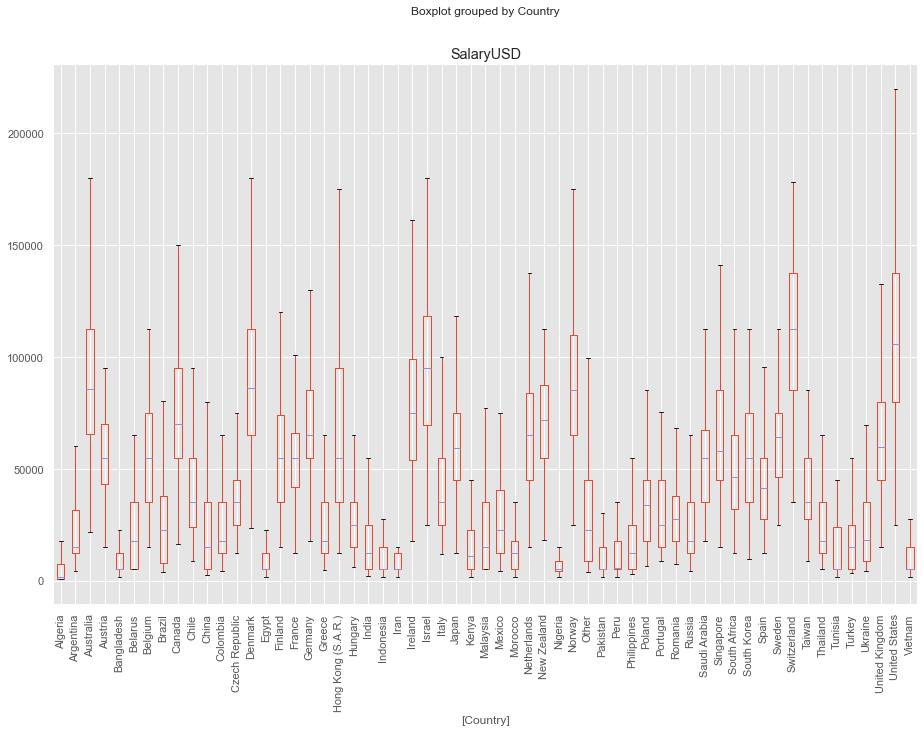

In [266]:
flierprops = dict(marker='o', markerfacecolor='steelblue', markersize=2,
                  linestyle='none')
df_income_filtered.boxplot(column=["SalaryUSD"], by=["Country"], rot=90, figsize=(15,10), flierprops=flierprops, showfliers=False)

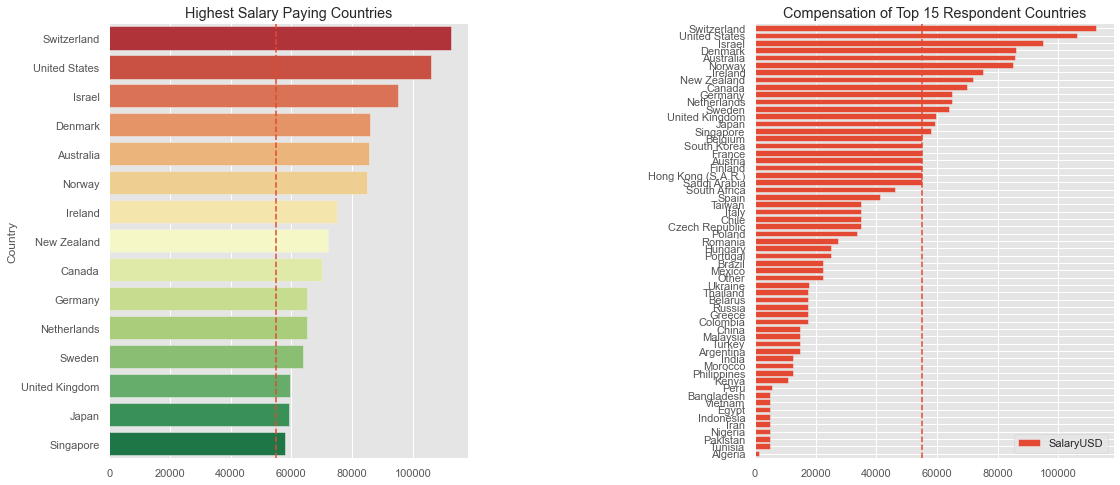

In [267]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=df_income_filtered.groupby('Country')['SalaryUSD'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('SalaryUSD',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(df_income_filtered['SalaryUSD'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=df_income_filtered.groupby('Country')['SalaryUSD'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_counts.index)]
max_coun.sort_values(by='SalaryUSD',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(df_income_filtered['SalaryUSD'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

### 1.2.0 subtract tax rate 

The OECD makes tax wedge numbers available for a few fixed household income situations.
The most appropriate seemed the category of "single person at 167% of average wage".
This is the most expensive category in all cases, so gives the most conservative result.

The data was not available by api or scrapable.
For OECD countries, the most recent numbers are from 2019.
For other countries, they are from 2010-2013 as there was only a dated document available.
+ http://compareyourcountry.org/taxing-wages/en/0/715/default/2019
+ https://read.oecd-ilibrary.org/taxation/taxi

In [268]:
df_tax = pd.read_excel('tax_wedge.xlsx', header = 0)
df_tax

,Country,taxWedge
0,Australia,34.4
1,Austria,51.0
2,Belgium,58.7
3,Canada,31.8
4,Chile,8.3
...,...,...
36,Colombia,30.2
37,China,38.3
38,India,26.1
39,Indonesia,8.2


In [269]:
#run only once
df_income_filtered = df_income_filtered.merge(df_tax,left_on='Country',right_on='Country',how='left')

+  We have to drop countries for which the tax wedge is not available

In [270]:
df_income_filtered=df_income_filtered.dropna(subset=['taxWedge'])

+ These are the countries we have left

<AxesSubplot:title={'center':'SalaryUSD'}, xlabel='[Country]'>

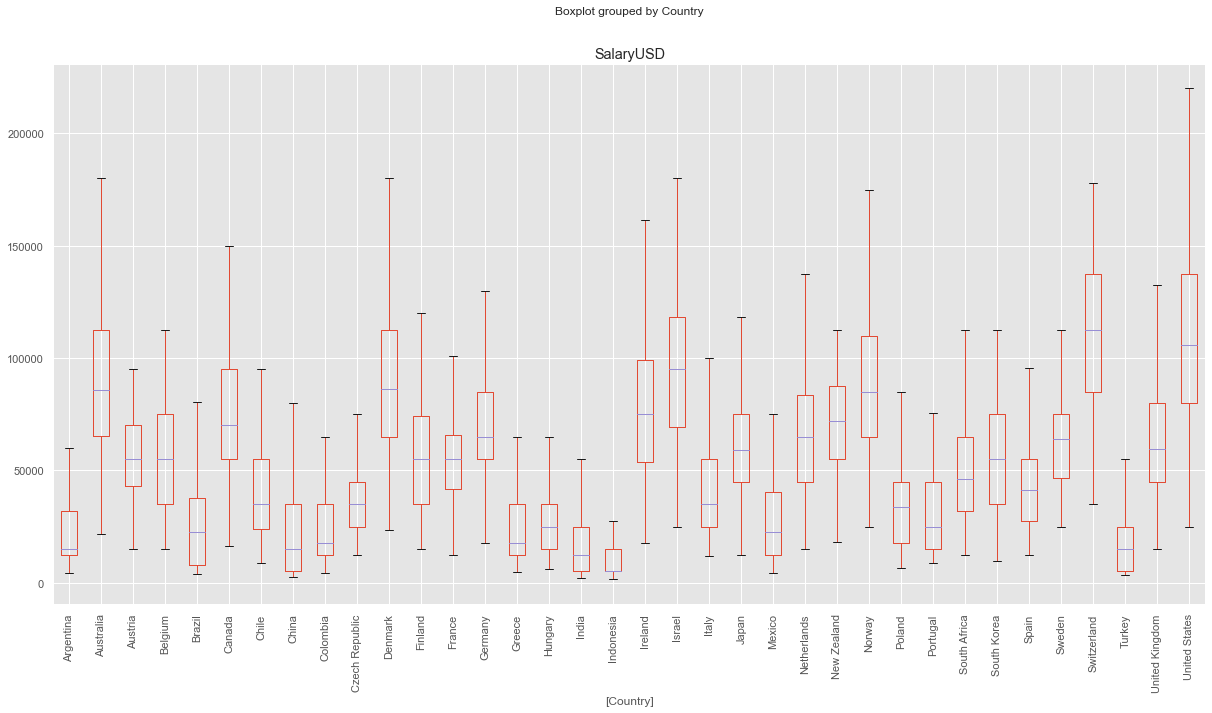

In [271]:
#plt.style.use('fivethirtyeight')
flierprops = dict(marker='o', markerfacecolor='steelblue', markersize=2,
                  linestyle='none')
df_income_filtered.boxplot(column=["SalaryUSD"], by=["Country"], rot=90, figsize=(20,10), flierprops=flierprops, showfliers=False)

In [272]:
df_income_filtered['SalaryAfterTaxUSD'] = df_income_filtered["SalaryUSD"] - df_income_filtered["SalaryUSD"]*(df_income_filtered['taxWedge']/100)
df_income_after_tax = df_income_filtered
df_income_after_tax.groupby('Country')['SalaryAfterTaxUSD','SalaryUSD'].median().sort_values(ascending=False, by= 'SalaryAfterTaxUSD')[:15]

,SalaryAfterTaxUSD,SalaryUSD
Country,,
Switzerland,82237.500,112500.0
United States,69854.000,106000.0
Israel,64030.000,95000.0
Australia,56143.760,85585.0
New Zealand,54504.000,72000.0
Denmark,50568.000,86000.0
Norway,49640.000,85000.0
Canada,47748.866,70013.0
Ireland,43650.000,75000.0


TODO: Check dtypes!

## Retrieving Data from Numbeo

### Numbeo.com API exploration kit

This section allows for easy exploration of the Numbeo.com API using view, store and load-to-memory functions.

All calls can be found under the [Numbeo.com API documentation][1] along with their respective descriptions.
    
Our API key is valid until 27/03/2021.

[1]: https://www.numbeo.com/api/doc.jsp "Numbeo.com API Documentation"

__IMPORTANT:__ Please run the below command in your terminal to allow ipynb to use large data streams. Note that this will break some functionality regarding the reading in of xslx files, and therefore should only be used when you want to store the data from the API. In the case the files already are in your workingdir, this step won't be necessary and the associated code communicating with the API can be skipped.

`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`

In [273]:
# The following methods allow for manual viewing and storing of the numbeo API data
import urllib, json
from pandas.io.json import json_normalize

prefix = "https://www.numbeo.com/api/"
key = "?api_key=5xu0b257se2ui6"

def mprint_api_response() :
    method = input('You are about to VIEW data in JSON format.\nEnter your API method:\n')
    parameters = '&' + input('Enter method paramaters if applicable:\n')
    if len(parameters) > 0:
        url = prefix + method + key + parameters
    else : 
        url = prefix + method + key
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    indented_data = json.dumps(data, indent=4)
    print(indented_data)   
    
    
def mstore_api_response() :
    method = input('You are about to STORE data in JSON format.\nEnter your API method:\n')
    parameters = '&' + input('Enter method paramaters if applicable:\n')
    filename = input('Please enter a filename to store the JSON data under:\n')
    if len(parameters) > 0:
        url = prefix + method + key + parameters
    else : 
        url = prefix + method + key
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    indented_data = json.dumps(data, indent=4)
    with open(filename + ".json", "w") as write_file: 
        json.dump(data, write_file, indent=4)
    print('\nWrite completed. Check your workingdir.')

    
def mopen_stored_response() : 
    filename = input('Please enter a filename to open:\n')
    with open(filename + '.json') as f:   
        data = json.load(f)
    return json.dumps(data, indent=4)

1. __mprint_api_response()__ to view the incoming server response in indented JSON format.
2. __mstore_api_response()__ to write the incoming server response to a custom filename.json within your workingdir.
3. __variable_name = mopen_stored_response()__ to open a saved filename.json and store the data to 'variable_name'.

In [274]:
# The following methods allow for viewing and storing multiple API calls through the usage of lists

prefix = "https://www.numbeo.com/api/"
key = "?api_key=5xu0b257se2ui6"


def print_api_response(method_queue, parameter, countries) :
    for method in method_queue :
        for country in countries :
            if len(parameter) > 0 :
                url = prefix + method + key + '&' + parameter + country
            else : 
                url = prefix + method + key 
            response = urllib.request.urlopen(url)
            data = json.loads(response.read())
            indented_data = json.dumps(data, indent=4)
            print(indented_data)    
    
    
def store_api_response(method_queue, parameter, countries) :
    for method in method_queue :
        for country in countries :
            if len(parameter) > 0 :
                url = prefix + method + key + '&' + parameter + country
            else : 
                url = prefix + method + key 
            filename = method + '_' + country
            response = urllib.request.urlopen(url)
            data = json.loads(response.read())
            indented_data = json.dumps(data, indent=4)
            with open(filename + ".json", "w") as write_file : 
                json.dump(data, write_file, indent=4)
            print('\nWrite completed to ' + filename + '.json.')

            
def load_to_dataframe() : 
    filename = input('Please enter a filename to open:\n')
    with open(filename + '.json') as f:   
        data = json.load(f)
    return json_normalize(data['prices'])



### A note on average prices
 Numbeo provides a broad selection of data points regarding the average prices for select items in countries. We use a handful of data points to serve as an estimator for our cost of living. The most important value being the average price of monthly rent for a single bedroom apartment both inside and outside of the city centre.

Now that we have the data on our median salaries per country in USD, we would now like to dig deeper and see where we can get the most out of our money earned. The average median paying country might not be the best place to live in due to the costs of living associated with said country. We will therefore make use of the Numbeo.com API to fetch data regarding the average rent prices and utilities, along with the Consumer Price Index (CPI). We will use this data to determine where we can get the most for our money earned.

Let us start by preparing our list of countries to request data on. By requesting all cities with available data from Numbeo, we can also get the names of all the countries that contain these cities. Comparing our list of median salary per country allows us to create a list of countries we should request data on. Thankfully, all countries are supported by the API. After API calling some simple methods on country data, we have assembled our list of countries in a format that will be accepted by the Numbeo API.

In [275]:
df_med_sal_taxed = df_income_after_tax.groupby('Country')['SalaryAfterTaxUSD','SalaryUSD'].median().sort_values(by= 'Country')
print(df_med_sal_taxed.index)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States'],
      dtype='object', name='Country')


In [276]:
# Let's load in that list of countries
survey_countries = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Czech%20Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'New%20Zealand', 'Norway', 'Poland', 'Portugal', 'South%20Africa',
       'South%20Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United%20Kingdom', 'United%20States']

We can request price data for a country using the API. Let's observe what data we get.

In [277]:
method_queue = ['country_prices']
parameter = 'country='
countries = ['Cayman%20Islands']
print_api_response(method_queue, parameter, countries)

{
    "name": "Cayman Islands",
    "currency": "KYD",
    "contributors12months": 18,
    "monthLastUpdate": 2,
    "contributors": 73,
    "yearLastUpdate": 2021,
    "prices": [
        {
            "data_points": 13,
            "item_id": 1,
            "lowest_price": 10,
            "average_price": 15,
            "highest_price": 53.366005378074824,
            "item_name": "Meal, Inexpensive Restaurant, Restaurants"
        },
        {
            "data_points": 11,
            "item_id": 2,
            "lowest_price": 80,
            "average_price": 85,
            "highest_price": 110,
            "item_name": "Meal for 2 People, Mid-range Restaurant, Three-course, Restaurants"
        },
        {
            "data_points": 8,
            "item_id": 3,
            "lowest_price": 8,
            "average_price": 8.75,
            "highest_price": 9,
            "item_name": "McMeal at McDonalds (or Equivalent Combo Meal), Restaurants"
        },
        {
            "da

We are particularly interested in the values representing the average costs of rent both inside and outside the city centres and the average costs of utilities(gas, water, light, etc.). We can store the API response in a dataframe and reference the index position that correspons these values. This allows us to collect the values and put them into a new dataframe containing the values we need only. We shall start by storing the data after which we can load it in without having to repeatedly stress the servers. We shall additionally also store country indices, which will contain the CPI for each country.

### _Ignore this step if you already acquired the API data_

In [278]:
method_queue = ['country_prices', 'country_indices']
parameter = 'currency=USD&country='
# storing the data (you only have to do this once. Note that this will create a lot of files in your workingdir)
store_api_response(method_queue, parameter, survey_countries)


Write completed to country_prices_Argentina.json.

Write completed to country_prices_Australia.json.

Write completed to country_prices_Austria.json.

Write completed to country_prices_Belgium.json.

Write completed to country_prices_Brazil.json.

Write completed to country_prices_Canada.json.

Write completed to country_prices_Chile.json.

Write completed to country_prices_China.json.

Write completed to country_prices_Colombia.json.

Write completed to country_prices_Czech%20Republic.json.

Write completed to country_prices_Denmark.json.

Write completed to country_prices_Finland.json.

Write completed to country_prices_France.json.

Write completed to country_prices_Germany.json.

Write completed to country_prices_Greece.json.

Write completed to country_prices_Hungary.json.

Write completed to country_prices_India.json.

Write completed to country_prices_Indonesia.json.

Write completed to country_prices_Ireland.json.

Write completed to country_prices_Israel.json.

Write complete

With our data stored we can go ahead and extract all the relevant data from our JSON files and put them in a new single dataframe.

In [279]:
column_indices = [21, 22, 25]
#these are the rows(items) we are interested in when considering the items read from our json file

index = survey_countries
columns = ['avg. rent centre', 'avg. rent outside', 'avg. utilities']
df = pd.DataFrame(index=index, columns=columns)

#Iterate over every country in our list and add their price data to our dataframe
method = 'country_prices'
for i, country in enumerate(survey_countries) :
    filename = method + '_' + country
    with open(filename + '.json') as f:   
        data = json.load(f)
    tempdf = json_normalize(data['prices'])
    for j, index in enumerate(column_indices) :
        df.iloc[:, j][i] = tempdf['average_price'][index]
        
df

,avg. rent centre,avg. rent outside,avg. utilities
Argentina,256.89,193.98,61.6293
Australia,1276.58,969.688,169.854
Austria,855.31,679.226,241.96
Belgium,856.152,724.043,165.686
Brazil,229.707,161.07,58.2004
...,...,...,...
Sweden,903.857,666.254,88.412
Switzerland,1607.63,1228.04,210.453
Turkey,212.521,137.43,67.6366
United%20Kingdom,1041.48,847.771,214.535


Now let's add the CPI values for each country to our dataframe.

In [280]:
method = 'country_indices'
index = survey_countries
cpi_array = []
for i, country in enumerate(survey_countries) :
    filename = method + '_' + country
    with open(filename + '.json') as f:   
        data = json.load(f)
    tempdf = json_normalize(data)
    cpi_array.append(tempdf['cpi_index'][0])
df['CPI'] = cpi_array
df

,avg. rent centre,avg. rent outside,avg. utilities,CPI
Argentina,256.89,193.98,61.6293,37.347902
Australia,1276.58,969.688,169.854,83.381616
Austria,855.31,679.226,241.96,75.634023
Belgium,856.152,724.043,165.686,76.166992
Brazil,229.707,161.07,58.2004,30.345143
...,...,...,...,...
Sweden,903.857,666.254,88.412,77.632390
Switzerland,1607.63,1228.04,210.453,124.994880
Turkey,212.521,137.43,67.6366,32.974291
United%20Kingdom,1041.48,847.771,214.535,71.254414


Next, we will add the data regarding the salary after tax for our list of countries.

In [281]:
taxed_sal = list(df_med_sal_taxed['SalaryAfterTaxUSD'])
taxed_sal

[9810.0,
 56143.76,
 26950.0,
 22714.999999999996,
 13905.0,
 47748.865999999995,
 32095.0,
 9255.0,
 12215.0,
 19005.0,
 50568.0,
 28160.0,
 25244.999999999996,
 31850.0,
 9327.5,
 13850.0,
 9237.5,
 4590.0,
 43650.0,
 64030.0,
 16100.0,
 38422.098,
 17280.0,
 37570.0,
 54504.0,
 49640.0,
 21554.748,
 13350.0,
 33495.725,
 40920.0,
 23144.616,
 31552.0,
 82237.5,
 8565.0,
 37421.263999999996,
 69854.0]

In [282]:
df.index = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States']
df['Salary After Tax (USD)'] = taxed_sal
df

,avg. rent centre,avg. rent outside,avg. utilities,CPI,Salary After Tax (USD)
Argentina,256.89,193.98,61.6293,37.347902,9810.000
Australia,1276.58,969.688,169.854,83.381616,56143.760
Austria,855.31,679.226,241.96,75.634023,26950.000
Belgium,856.152,724.043,165.686,76.166992,22715.000
Brazil,229.707,161.07,58.2004,30.345143,13905.000
...,...,...,...,...,...
Sweden,903.857,666.254,88.412,77.632390,31552.000
Switzerland,1607.63,1228.04,210.453,124.994880,82237.500
Turkey,212.521,137.43,67.6366,32.974291,8565.000
United Kingdom,1041.48,847.771,214.535,71.254414,37421.264


Let's consider our fixed expenses to be rent and utilities. What remains of our salary after these expenditures in a year? We subtract rent and utilities and are left with the Disposable Income column.

In [283]:
expendable_income = []
for i, country in enumerate(survey_countries) :
    expendable_income.append(df['Salary After Tax (USD)'].iloc[i] - (df['avg. rent centre'].iloc[i]*12 - df['avg. utilities'].iloc[i]*12))
df['Disposable Income'] = expendable_income
df.sort_values(by= 'Disposable Income', ascending=False)[:10]

,avg. rent centre,avg. rent outside,avg. utilities,CPI,Salary After Tax (USD),Disposable Income
Switzerland,1607.63,1228.04,210.453,124.994880,82237.500,65471.398520
United States,1341.73,1080.83,163.946,70.905974,69854.000,55720.628710
Israel,1037.72,814.944,227.617,84.640463,64030.000,54308.747722
Australia,1276.58,969.688,169.854,83.381616,56143.760,42863.083997
New Zealand,1155.69,903.764,131.738,78.022967,54504.000,42216.560807
Denmark,1070.86,784.754,199.909,89.510221,50568.000,40116.593477
Norway,1183.05,925.304,193.186,104.792352,49640.000,37761.600462
Canada,1054.52,879.891,130.322,69.987486,47748.866,36658.487843
South Korea,583.888,412.215,155.444,77.324483,40920.000,35778.679169
Japan,766.617,522.368,201.091,82.688409,38422.098,31635.792319


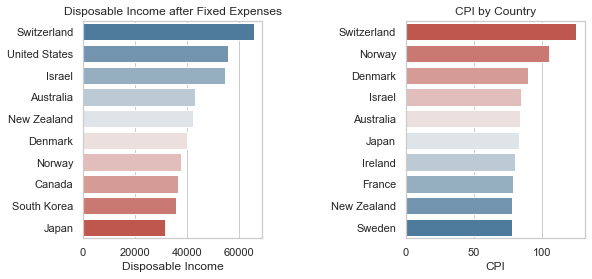

In [313]:
fig, ax= plt.subplots(1,2, figsize=(9,4))

sal_coun=df.sort_values(by= 'Disposable Income', ascending=False)[:10]
sns.barplot('Disposable Income',sal_coun.index,data=sal_coun,palette=sns.diverging_palette(240, 15, n=10),ax=ax[0])
ax[0].set_title('Disposable Income after Fixed Expenses')
ax[0].set_xlabel('Disposable Income')

cpi_coun=df.sort_values(by= 'CPI', ascending=False)[:10]
sns.barplot('CPI',cpi_coun.index,data=cpi_coun,palette=sns.diverging_palette(15, 240, n=10),ax=ax[1])
ax[1].set_title('CPI by Country')
ax[1].set_xlabel('CPI')

plt.subplots_adjust(wspace=0.8)
sns.set_style("whitegrid")
plt.show()

Switzerland clearly has the highest median salary of all countries, But before we pack our bags we should consider what our money is worth in each country. As can be seen above, Switzerland has a very high Consumer Price Index. This means that the money we earn there is being drained faster by local expenses and thus means reduced purchasing power.

Now we will use a custom index to get a clear view of where we can get the most bang for our buck. We shall calculate this index by subtracting our costs from our salary after tax which represents our disposable income. Dividing this over CPI followed by a multiplication times 100 gives us an indication of our actual purchasing power in a country. We shall distinguish between living in the city centre and living outside of the city centre.

In [285]:
custom_index = []
for i, country in enumerate(survey_countries) :
    custom_index.append(((df['Salary After Tax (USD)'].iloc[i] - (df['avg. rent centre'].iloc[i]*12 - df['avg. utilities'].iloc[i]*12))/df['CPI'].iloc[i])*100)
df['CPI Adjusted PP Centre'] = custom_index
df.sort_values(by= 'CPI Adjusted PP Centre', ascending=False)[:10]

,avg. rent centre,avg. rent outside,avg. utilities,CPI,Salary After Tax (USD),Disposable Income,CPI Adjusted PP Centre
United States,1341.73,1080.83,163.946,70.905974,69854.000,55720.628710,78583.827947
South Africa,451.722,386.878,99.0059,42.259977,33495.725,29263.136837,69245.511245
Israel,1037.72,814.944,227.617,84.640463,64030.000,54308.747722,64164.048753
Chile,462.747,389.994,141.273,50.607383,32095.000,28237.310052,55796.818771
New Zealand,1155.69,903.764,131.738,78.022967,54504.000,42216.560807,54107.864143
Switzerland,1607.63,1228.04,210.453,124.994880,82237.500,65471.398520,52379.264070
Canada,1054.52,879.891,130.322,69.987486,47748.866,36658.487843,52378.632397
Australia,1276.58,969.688,169.854,83.381616,56143.760,42863.083997,51405.916803
South Korea,583.888,412.215,155.444,77.324483,40920.000,35778.679169,46270.829098
Denmark,1070.86,784.754,199.909,89.510221,50568.000,40116.593477,44817.891354


In [286]:
custom_index = []
for i, country in enumerate(survey_countries) :
    custom_index.append(((df['Salary After Tax (USD)'].iloc[i] - (df['avg. rent outside'].iloc[i]*12 - df['avg. utilities'].iloc[i]*12))/df['CPI'].iloc[i])*100)
df['CPI Adjusted PP'] = custom_index
df.sort_values(by= 'CPI Adjusted PP', ascending=False)[:10]

,avg. rent centre,avg. rent outside,avg. utilities,CPI,Salary After Tax (USD),Disposable Income,CPI Adjusted PP Centre,CPI Adjusted PP
United States,1341.73,1080.83,163.946,70.905974,69854.000,55720.628710,78583.827947,82999.137951
South Africa,451.722,386.878,99.0059,42.259977,33495.725,29263.136837,69245.511245,71086.796510
Israel,1037.72,814.944,227.617,84.640463,64030.000,54308.747722,64164.048753,67322.506246
New Zealand,1155.69,903.764,131.738,78.022967,54504.000,42216.560807,54107.864143,57982.527495
Chile,462.747,389.994,141.273,50.607383,32095.000,28237.310052,55796.818771,57521.942934
Switzerland,1607.63,1228.04,210.453,124.994880,82237.500,65471.398520,52379.264070,56023.483297
Australia,1276.58,969.688,169.854,83.381616,56143.760,42863.083997,51405.916803,55822.552832
Canada,1054.52,879.891,130.322,69.987486,47748.866,36658.487843,52378.632397,55372.820048
South Korea,583.888,412.215,155.444,77.324483,40920.000,35778.679169,46270.829098,48935.020550
Denmark,1070.86,784.754,199.909,89.510221,50568.000,40116.593477,44817.891354,48653.508676


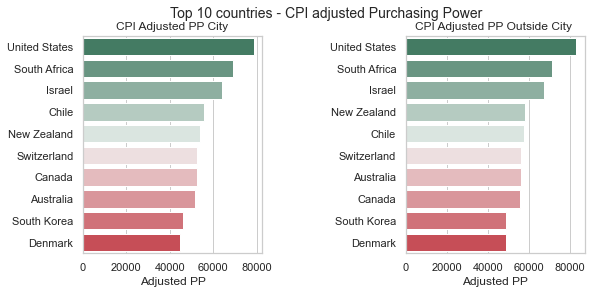

In [312]:
fig, ax= plt.subplots(1,2, figsize=(9,4))
fig.suptitle('Top 10 countries - CPI adjusted Purchasing Power',size = 14);
sal_coun=df.sort_values(by= 'CPI Adjusted PP Centre', ascending=False)[:10]
sns.barplot('CPI Adjusted PP Centre',sal_coun.index,data=sal_coun,palette=sns.diverging_palette(150, 10, n=10),ax=ax[0])
ax[0].set_title('CPI Adjusted PP City')
ax[0].set_xlabel('Adjusted PP')

cpi_coun=df.sort_values(by= 'CPI Adjusted PP', ascending=False)[:10]
sns.barplot('CPI Adjusted PP',cpi_coun.index,data=cpi_coun,palette=sns.diverging_palette(150, 10, n=10),ax=ax[1])
ax[1].set_title('CPI Adjusted PP Outside City ')
ax[1].set_xlabel('Adjusted PP')

plt.subplots_adjust(wspace=0.8)
sns.set_style("whitegrid")
plt.show()

Staying outside the city centre seems to cause Australia and Canada to swap places in our ranking, but overall does not do much for our top 10. We do see however a slight increase in our purchasing power accross the baord, indicating that living outside the city centre could be an economically beneficial choice.

Our top three countries are an interesting result considering their geographically varying locations. In the United States we seem to have the most purchasing power after tax and fixed expenses adjusted for DPI. This does however not take into account the costs associated with healthcare in the United States. South Africa and Israel both have [universal health care][1] while the US does not, which could possibly explain the gap in CPI adjusted purchasing power compared to the United States, as their universal health care is facilitated through taxation.


[1]: https://en.wikipedia.org/wiki/List_of_countries_with_universal_health_care#:~:text=Countries%20with%20universal%20healthcare%20include,Ukraine%2C%20and%20the%20United%20Kingdom. "List of countries with universal health car"

## Part 2: The influence of gender on salary in data science and related fields

Great, now Eve knows that x is the place to go if she values...

But what is about her second concern, namely that her gender might have an influence on the amount of money she will be paid? In the following this question is analysed first for all countries, followed by the countries that Eve considers moving to.

+ Clean gender responses:

In [288]:
#df_income_filtered
df_income_filtered.Gender.unique()

array(['Male', 'Female', 'A different identity',
       'Non-binary, genderqueer, or gender non-conforming', nan,
       'Prefer not to say', 'Prefer to self-describe', 'Not Asked',
       'Alien', 'Non-binary/third gender', 'toad frog', 'confused',
       'Reptilian',
       'Attack Helicopter. (serious dude, gender questions?)',
       'Any human one', 'Attack Helicopter', 'Muppet',
       'Attack Helicopter (M)',
       'Attackhelicopter with rabbitears and afro-icelandic teeth',
       'Grayson Perry', 'Vulcan', 'Cyborg',
       'This question is inappropriate. ', 'Meat Popsicle ',
       'There are only two genders for people, either male or female. I am a male.',
       'Dragon', 'Apache Helicopter', 'Pastafarian'], dtype=object)

Alright, so apparently people become creative when they feel triggered for some reason or another. We even have a person in our data that identifies as a toad frog. Nice.<br>
On a more serious note, in order to make the analysis feasible, we keep Male and Female and map all responses that indicate a non-binary gender identification into a category 'Non-binary'. We drop the Attack Helicopters along with the rest of the bogus responses and the nan entries for gender.

In [289]:
df_income_gender = df_income_filtered_p2
df_income_gender = df_income_gender.drop(columns=['countryMedianSalary'])
#Mapped to diverse: 'Non-binary/third gender','A different identity','Non-binary, genderqueer, or gender non-conforming

df_income_gender['Gender'].str.count('Male').sum()

GenderMask = df_income_gender['Gender'].str.contains('Male|Female|A different identity|Non-binary, genderqueer, or gender non-conforming|Non-binary/third gender',na=False)
df_income_gender = df_income_gender[GenderMask].reset_index(drop=True)
df_income_gender = df_income_gender.replace({'Gender': {'A different identity': 'Non-binary', 'Non-binary, genderqueer, or gender non-conforming':'Non-binary','Non-binary/third gender' :'Non-binary'}})

### Amount of responses for each gender
We now obtained the cleaned data (in respect to salary and gender) from all sources. Let's see how the response distribution looks like for the genders.

In [290]:
df_income_gender['Gender'].value_counts()

Male          26955
Female         4270
Non-binary       49
Name: Gender, dtype: int64

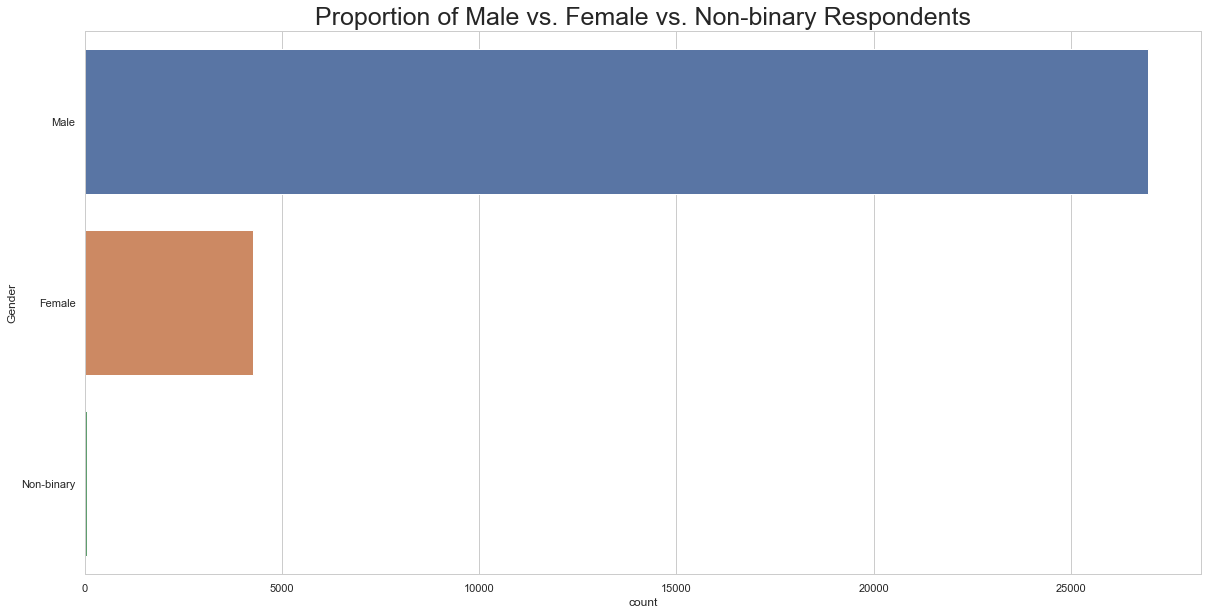

In [291]:
plt.subplots(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.countplot(y=df_income_gender['Gender']);
plt.title('Proportion of Male vs. Female vs. Non-binary Respondents',size = 25)
plt.show()

The above bar chart indicates that there are actually a lot more male compared to female respondents. In fact, as it stands, there are more than **6 times more male respondents than female respondents**. That of course does not have to mean that there are 6,3 times more male data professionals than female data professionals, as perhaps even participating in one of the surveys already selects for the male gender (i.e. males are more likely to answer this type of survey).

Even so, one raises an eyebrow when seeing this result. 

We also need to keep in mind that this is aggregated data from 2 sources. Maybe the respondent population gender population differs from one source to the other?

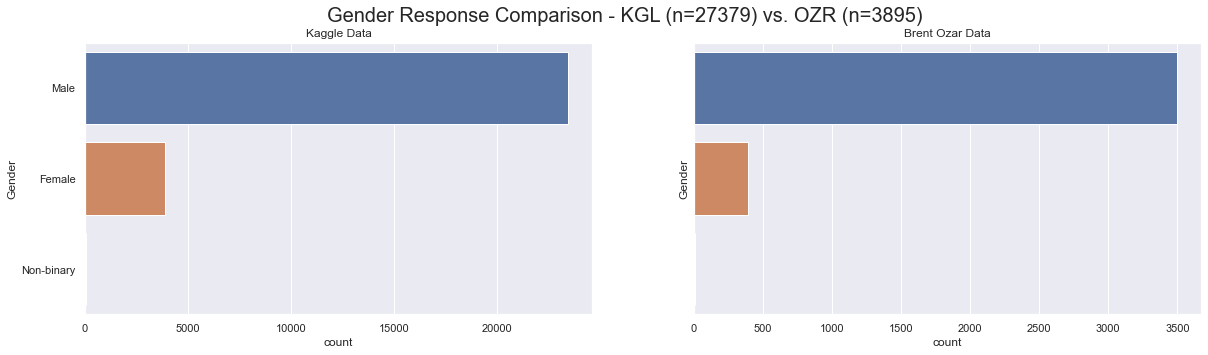

In [292]:
genderData_OZR = df_income_gender[df_income_gender['DataSet']==1]
genderData_KGL = df_income_gender[df_income_gender['DataSet']==0]

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Gender Response Comparison - KGL (n=27379) vs. OZR (n=3895)',size = 20);

# KGL gender responses
sns.countplot(ax=axes[0], y=genderData_KGL['Gender'])
axes[0].set_title('Kaggle Data');

# OZR gender responses
sns.countplot(ax=axes[1], y=genderData_OZR['Gender'])
axes[1].set_title('Brent Ozar Data');

In [293]:
print(f"For every female respondent to the Brent Ozar Surveys of 2018 and 19, there are approximately {np.round(genderData_OZR[genderData_OZR['Gender']=='Male'].shape[0]/genderData_OZR[genderData_OZR['Gender']=='Female'].shape[0],0)} male respondents.\n\n")
print(f"For every female respondent to the Kaggle Surveys of 2017, 18 and 19, there are approximately {np.round(genderData_KGL[genderData_KGL['Gender']=='Male'].shape[0]/genderData_KGL[genderData_KGL['Gender']=='Female'].shape[0],1)} male respondents.")

For every female respondent to the Brent Ozar Surveys of 2018 and 19, there are approximately 9.0 male respondents.


For every female respondent to the Kaggle Surveys of 2017, 18 and 19, there are approximately 6.0 male respondents.


It seems like that there are more female data professionals active within the Kaggle community than in the Brent Ozar community. 

### Salary comparison by gender

Alright, we now know that women are underrepresented in our data. But Eve actually wants to know whether she can expect to get paid as much as a male data scientist with a comparable skills set. In order to answer that question, lets take the large aggregated dataset with salary data stemming from the years 2017-2019 into account.

In [294]:
salary_by_gender = df_income_gender.groupby("Gender")["SalaryUSD"].describe()
salary_by_gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4270.0,56913.260272,50093.604836,500.0,15000.0,45000.0,85000.0,400000.0
Male,26955.0,63578.029538,61996.419928,500.0,17500.0,51546.0,95000.0,2500000.0
Non-binary,49.0,76837.714286,54833.652025,2749.0,40280.0,73000.0,95000.0,235000.0


Since we only have $n=49$ respondents with a non-binary gender, we leave them out for the further analysis. 

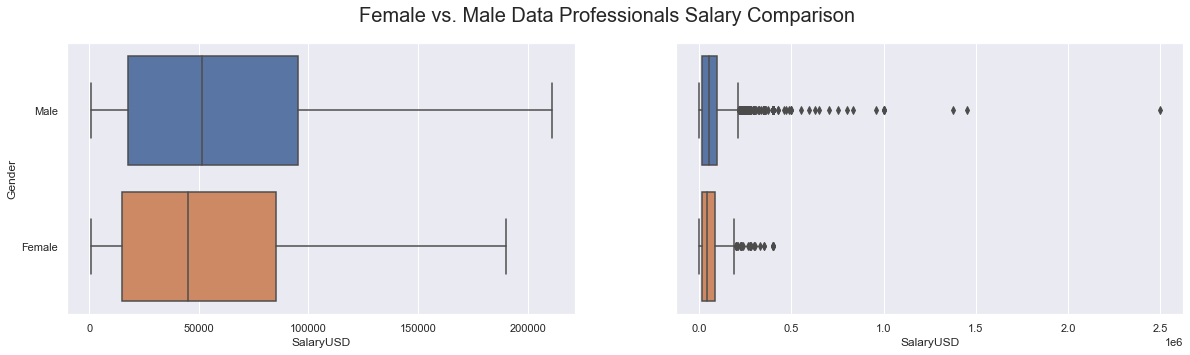

In [295]:
df_income_BiNgender = df_income_gender[~df_income_gender['Gender'].str.match('Non-binary')]

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Female vs. Male Data Professionals Salary Comparison',size = 20);

bp = sns.boxplot(ax=axes[0],data =df_income_BiNgender, y= 'Gender',x= 'SalaryUSD',showfliers=False )
bpoutl = sns.boxplot(ax=axes[1],data =df_income_BiNgender, y= 'Gender',x= 'SalaryUSD',showfliers=True )
plt.ylabel('')
plt.show()

Notice on above Boxplot that there are a lot more high rolling (in terms of salary) outliers for the men compared to the females. 

In [296]:
print(f"After data cleaning, the highest earning male data professional earns {df_income_BiNgender[df_income_BiNgender['Gender']=='Male'].SalaryUSD.values.max()/df_income_BiNgender[df_income_BiNgender['Gender']=='Female'].SalaryUSD.values.max()} more than the highest earning female data professional.")

After data cleaning, the highest earning male data professional earns 6.25 more than the highest earning female data professional.


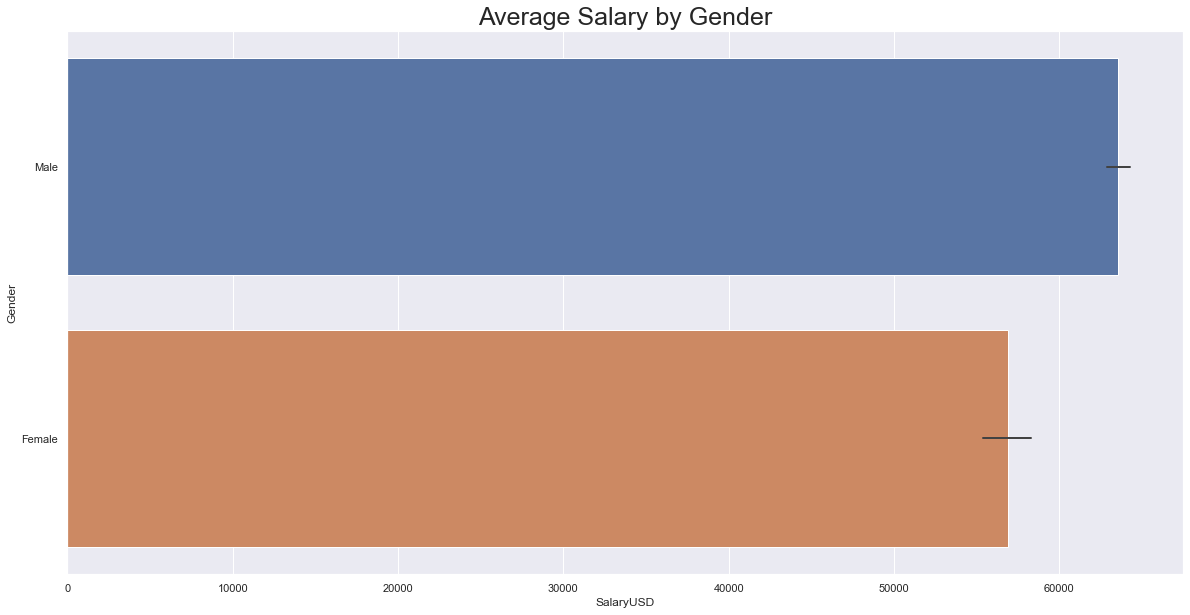

In [297]:
plt.subplots(figsize=(20,10))
ax = sns.barplot(data= df_income_BiNgender,x='SalaryUSD',y='Gender',errwidth = 2)
plt.title('Average Salary by Gender',size = 25) 
plt.show()

Above boxplot and barchart indicate that the mean as well as the median salary for male data professionals is higher than that of female workers when taking all countries into account. 
But we also need to remember that there are a lot more male respondents than female respondents which could skew the actual result. How can we be sure that this finding and what we see is not down to mere chance but that there is an actual statistically significant difference in the amount of expected salary between male and female data scientists? 
Let's perform hypothesis testing to get to the bottom of this!<br>

First off, the parameter that we are interested in is the expected salary $\mu_s$ of a data professional and we can split our population into two samples of male and female data scientists. We can assume that these samples are independent because the salaries of male data scientists are not dependant on the salaries of female data scientists and vice-versa. Hence,<br>

let $\mu_{s_F}$, $\mu_{s_M}$ denote the expected salary for the female and male population respectively. 

We define our null hypothesis as follows:

$$
H_0: \mu_{s_F} = \mu_{s_M}
$$
We define our alternative hypothesis as follows:
$$
H_a: \mu_{s_F} \ne \mu_{s_M}
$$

Let's test at a significance level of $\alpha = 1\%$. The underlying samples have relatively large sample sizes with $n_F = 4270$ and $n_M = 26955$, therefore we perform a two-sample $z$-test. We thus assume that we have enough data points to get a very good estimate of the true mean and standard deviation of the 'complete' populations.<br>

While we can assume sample independence, the same does not hold for the standard deviation. It can be seen from above boxplot that $\sigma$ is different for the male and female population.

In the following, we perform a two-sample two-sided $z$-test in order to find whether the defined $H_0$ can be rejected or not. In order to compare the two means from distributions with different $\sigma$, we make use of statsmodel's `CompareMeans.ztest_ind` function.

In [298]:
Fem_pop = df_income_BiNgender[df_income_BiNgender.loc[:,'Gender']=='Female'].SalaryUSD.values
Male_pop= df_income_BiNgender[df_income_BiNgender.loc[:,'Gender']=='Male'].SalaryUSD.values

In [299]:
import statsmodels.stats.weightstats as ws
from numpy import sqrt, abs, round
from scipy.stats import norm
from statistics import stdev

col_Fem = ws.DescrStatsW(Fem_pop)
col_Male = ws.DescrStatsW(Male_pop)

cm_obj = ws.CompareMeans(col_Fem, col_Male)

z_stat, z_pval = cm_obj.ztest_ind(alternative='two-sided',usevar='unequal',value=0)

print(f'Value of z statistic: {z_stat}    |     p-value: {z_pval}')

Value of z statistic: -7.799102256327644    |     p-value: 6.234912800087574e-15


The $p$-value as computed by the above $z$-test is vanishingly small. This leads us to reject the null hypothesis $H_0$ that there is no difference in expected salary between male and female data professionals; i.e. there is a statistically significant evidence of a difference between the average salary for men and women in the information sector. (Notice also that the z statistic of $-7.8$ indicates that the raw score x (in this case female salary) is 7.8  standard deviation units smaller than the population mean.)

In [300]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):

    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [301]:
#z, p = twoSampZ(Fem_pop.mean(),Male_pop.mean(), 0, stdev(Fem_pop),stdev(Male_pop) , len(Fem_pop), len(Male_pop))  #two sample t-test
z, p = twoSampZ(Fem_pop.mean(),Male_pop.mean(), 0, Fem_pop.std(), Male_pop.std() , len(Fem_pop), len(Male_pop))
print (z, p)

-7.8 0.0


**Observation:** Interestingly, even though in the statsmodels documentation it is specified that `CompareMeans.ztest_ind` performs a $z$-test, apparently the sample standard deviation is taken into account for the computation. This has been spotted when using above specified "[manually implemented](https://stats.stackexchange.com/questions/124096/two-samples-z-test-in-python)" function and parsing either `stdev`(sample std) or `.std()`(population std). Either way, the found values for $z$-statistic and corresponding the $p$-value do not differ much ($-7.799$ with `stdev` vs.$-7.8$ with `.std()`.

Seeing these results, Eve's heart drops a bit lower as she really hoped and wished that men and women receive equal pay these days (we cannot reallys claim that this is not the case for 2021 as all the data we base our analysis on stems from the years 2017-2019, however, based on recent [media coverage](https://www.nature.com/articles/d41586-019-00220-y) of the pay-gap problem, it is unlikely that the tides have turned since these years).

Now she is interested whether the same also holds for the countries that she considers moving to based on the analysis done in the first part of the Notebook.